**Question 1**

In [1]:
import cv2
!pip install easyocr
import easyocr
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.3 MB/s eta 0:00:00


In [2]:
image1 = cv2.imread('/content/drive/MyDrive/Computer_Vision/image1.jpg')

Original Image


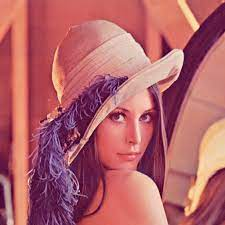

Median Filtered Image


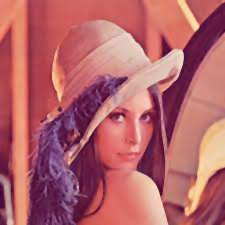

Max Filtered Image


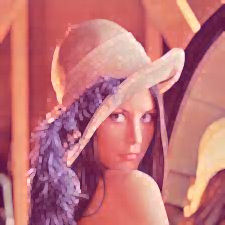

Min Filtered Image


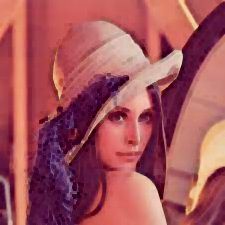

In [3]:
median_filtered = cv2.medianBlur(image1, 3)

max_filtered = cv2.dilate(image1, np.ones((3, 3), np.uint8))
min_filtered = cv2.erode(image1, np.ones((3, 3), np.uint8))
print('Original Image')
cv2_imshow(image1)
print('Median Filtered Image')
cv2_imshow(median_filtered)
print('Max Filtered Image')
cv2_imshow(max_filtered)
print('Min Filtered Image')
cv2_imshow(min_filtered)


**Question 2**

In [4]:
image2 = cv2.imread('/content/drive/MyDrive/Computer_Vision/image2.jpg',cv2.IMREAD_COLOR)

In [5]:
def increase_details(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    print('Original Image')
    cv2_imshow(image)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_filtered = cv2.Laplacian(gray_image, cv2.CV_64F)
    laplacian_filtered_1 = cv2.convertScaleAbs(laplacian_filtered)

    print('Laplacian filtered')
    cv2_imshow(laplacian_filtered_1)

    enhanced_image = image - cv2.merge([laplacian_filtered]*3)

    cv2_imshow(enhanced_image)


Original Image


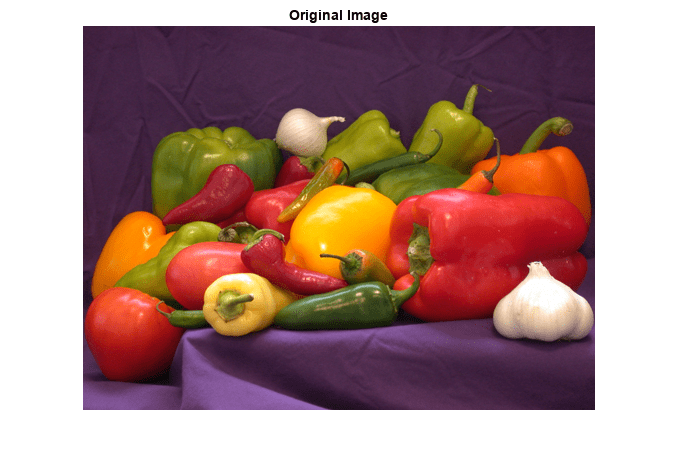

Laplacian filtered


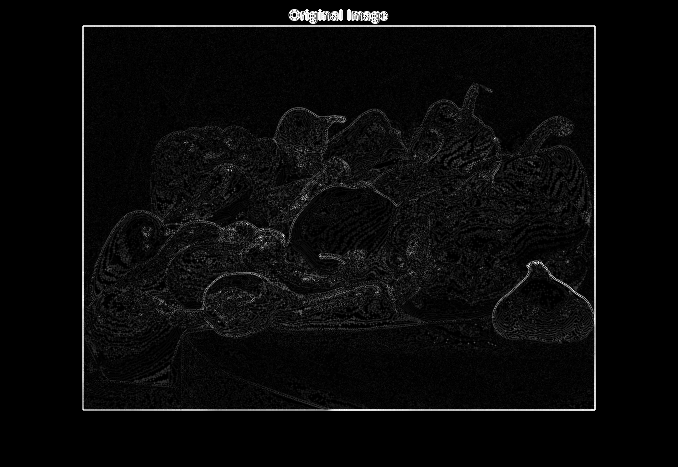

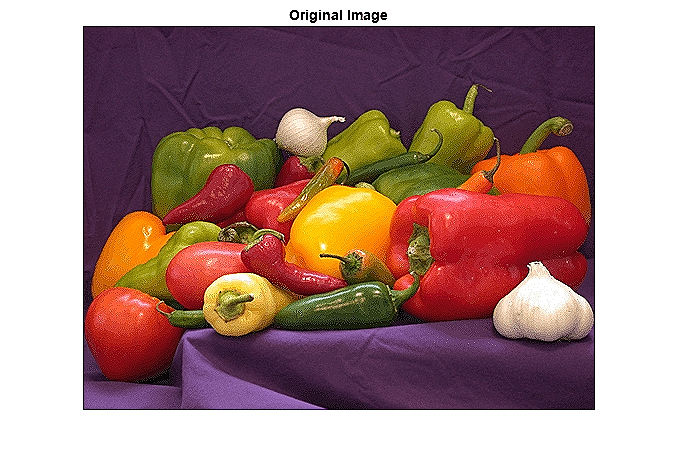

In [10]:
path_img2 = '/content/drive/MyDrive/Computer_Vision/image2.jpg'
increase_details(path_img2)

**Question 3**

In [ ]:
def detect_edges(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 50, 200)
    print('Original Image')
    cv2_imshow(image)
    print('Edges')
    cv2_imshow(edges)


In [ ]:
image_path3 = '/content/drive/MyDrive/Computer_Vision/image3.jpg'
image_path4 = '/content/drive/MyDrive/Computer_Vision/image4.jpg'
detect_edges(image_path3)
detect_edges(image_path4)

**Question 4**

In [ ]:
def apply_filters(image_path, kernel_size):
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  average_3x3 = cv2.blur(image, (3, 3))
  average_9x9 = cv2.blur(image, (9, 9))
  gaussian_3x3 = cv2.GaussianBlur(image, (3, 3), 0)
  gaussian_9x9 = cv2.GaussianBlur(image, (9, 9), 0)

  print('Original Image')
  cv2_imshow(image)
  print('3x3 Average Filter')
  cv2_imshow(average_3x3)
  print('9x9 Average Filter')
  cv2_imshow(average_9x9)
  print('3x3 Gaussian Filter')
  cv2_imshow(gaussian_3x3)
  print('9x9 Gaussian Filter')
  cv2_imshow(gaussian_9x9)


Original Image


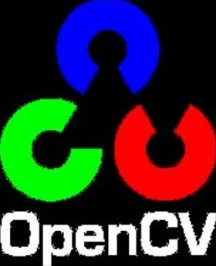

3x3 Average Filter


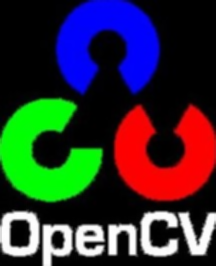

9x9 Average Filter


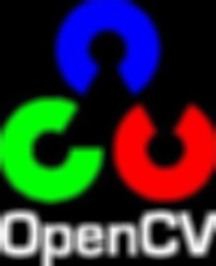

3x3 Gaussian Filter


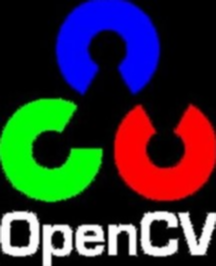

9x9 Gaussian Filter


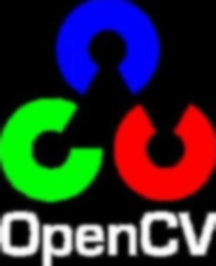

In [ ]:
image_path5 = '/content/drive/MyDrive/Computer_Vision/image5.jpg'
apply_filters(image_path5, kernel_size=3)

**Question 5**

In [ ]:
def q_5(image_path):
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  print('Original Image')
  cv2_imshow(image)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  print('Thresholded Image')
  cv2_imshow( thresholded_image)

  reader = easyocr.Reader(['en'])
  results_1 = reader.readtext(gray_image)
  results_2 = reader.readtext(thresholded_image)
  license_plate_text = results_1[0][1] if results_1 else (results_2[0][1] if results_2 else "No license plate detected")
  print('License Plate:', license_plate_text)

Original Image


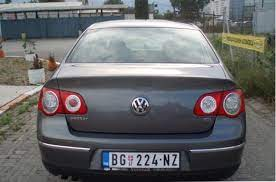

Thresholded Image


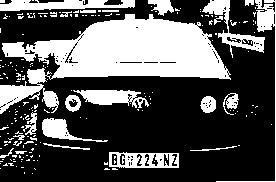

License Plate: BGe 224 NZi
Original Image


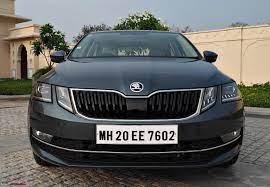

Thresholded Image


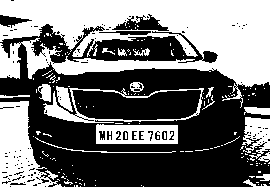

License Plate: MH 20 EE 7602


In [ ]:
image6_1 = '/content/drive/MyDrive/Computer_Vision/image6.1.jpg'
q_5(image6_1)
image6_2 = '/content/drive/MyDrive/Computer_Vision/image6.2.jpg'
q_5(image6_2)

**Question 6**

In [ ]:
!pip install Pillow

In [ ]:
!pip install mtcnn
from mtcnn.mtcnn import MTCNN

In [ ]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00


In [ ]:
import torch
from PIL import Image
from torchvision import transforms
from facenet_pytorch import MTCNN, InceptionResnetV1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

def get_face_embedding(image_path):
    img = Image.open(image_path)

    faces = mtcnn(img)

    if faces is not None and faces.dim() > 0:

        embeddings = model(faces.to(device)).detach().cpu().numpy()

        target_face_embedding = embeddings[0]
        return target_face_embedding
    else:
        return None

def compare_embeddings(embedding1, embedding2, threshold=0.6):

    distance = ((embedding1 - embedding2) ** 2).sum()

    if distance < threshold:
        return True
    else:
        return False

image_path_1 = '/content/drive/MyDrive/Computer_Vision/johnny_depp_1.jpg'
image_path_2 = '/content/drive/MyDrive/Computer_Vision/johnny_depp_2.jpg'

embedding_1 = get_face_embedding(image_path_1)
embedding_2 = get_face_embedding(image_path_2)

if embedding_1 is not None and embedding_2 is not None:
    result = compare_embeddings(embedding_1, embedding_2)

    if result:
        print("The images belong to the same person.")
    else:
        print("The images do not belong to the same person.")
else:
    print("No face detected in one or both images.")


The images belong to the same person.


**Question 7**

Original Image


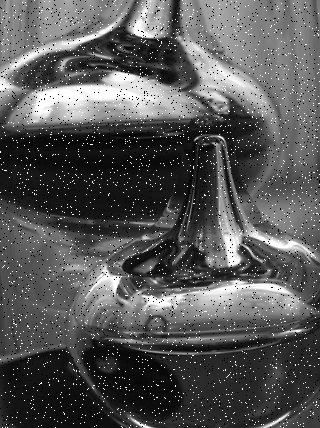

Median Filtered Image


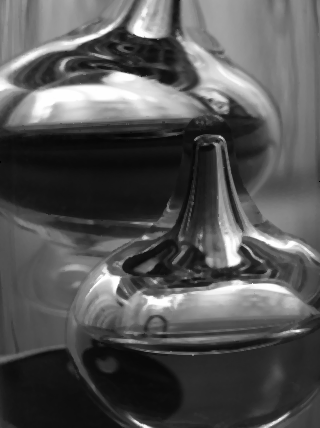

In [ ]:
image7 = cv2.imread('/content/drive/MyDrive/Computer_Vision/image7.jpg',cv2.IMREAD_COLOR)
median_filtered = cv2.medianBlur(image7, 3)
print('Original Image')
cv2_imshow(image7)
print('Median Filtered Image')
cv2_imshow(median_filtered)


**Question 8**

In [ ]:
def increase_contrast(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    print('Original Image')
    cv2_imshow(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    print('Image with Increased Contrast')
    cv2_imshow(equalized_image)
    return equalized_image

Original Image


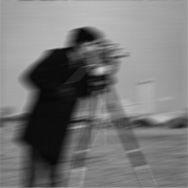

Image with Increased Contrast


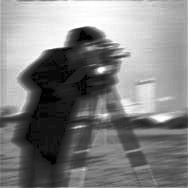

Original Image


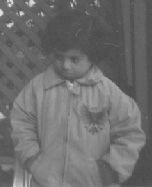

Image with Increased Contrast


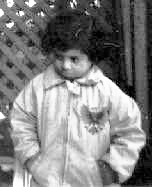

In [ ]:
image_path8_1 = '/content/drive/MyDrive/Computer_Vision/image8.1.jpg'
image_path8_2 = '/content/drive/MyDrive/Computer_Vision/image8.2.jpg'
image_path8_3 = '/content/drive/MyDrive/Computer_Vision/image8.3.jpg'
image8_1 = cv2.imread(image_path8_1, cv2.IMREAD_GRAYSCALE)
image8_2 = cv2.imread(image_path8_2, cv2.IMREAD_GRAYSCALE)
image8_3 = cv2.imread(image_path8_3, cv2.IMREAD_GRAYSCALE)

eq_img8_1 = increase_contrast(image_path8_1)
eq_img8_2 = increase_contrast(image_path8_2)

In [ ]:
def def_8(gray_image):
    print('Original Image')
    cv2_imshow(gray_image)
    laplacian_filtered = cv2.Laplacian(gray_image, cv2.CV_64F)
    laplacian_filtered_1 = cv2.convertScaleAbs(laplacian_filtered)
    gray_image = cv2.medianBlur(gray_image,3)
    enhanced_image = gray_image - laplacian_filtered
    print('Enhanced Image')
    cv2_imshow(enhanced_image)
    return enhanced_image


Original Image


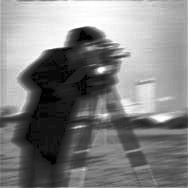

Enhanced Image


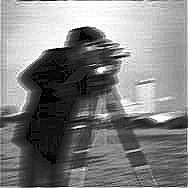

Original Image


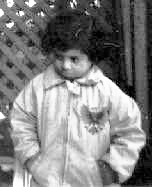

Enhanced Image


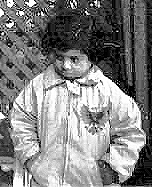

Original Image


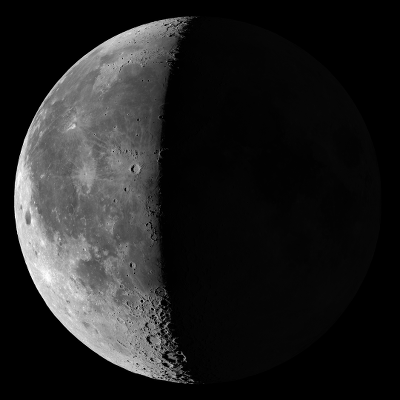

Enhanced Image


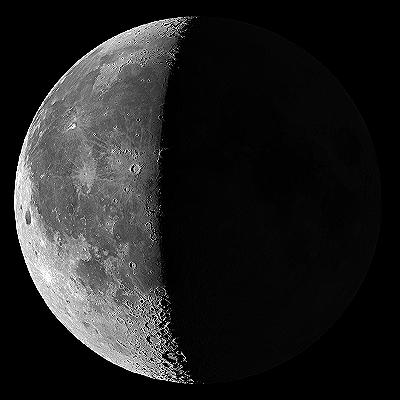

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def_8(eq_img8_1)
def_8(eq_img8_2)
def_8(image8_3)